add_bathymetry in colormap_utils: Remap set to False, change to True to auto rescale cmaps to match max scales
186 events found


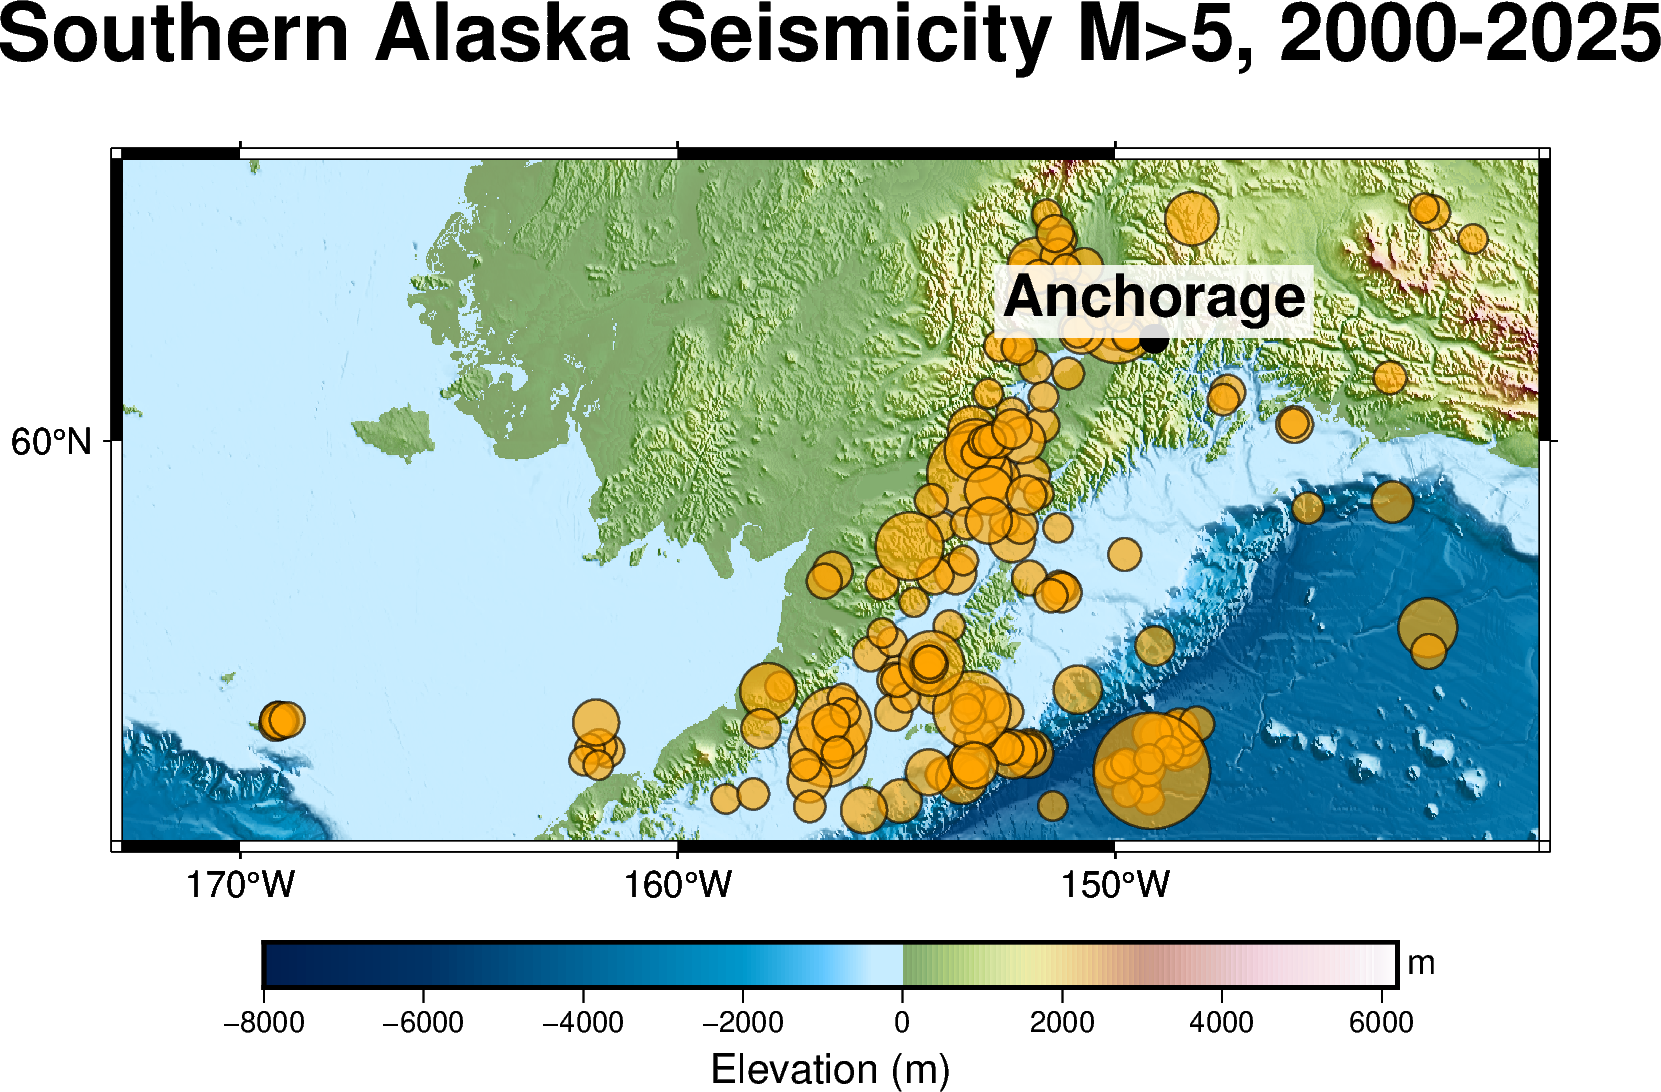

SouthernAlaskaOverview.png


In [1]:
import scripts.mapping_stations as ms
import scripts.general_mapping as gm
import scripts.colormap_utils as cu
import scripts.mapping_events as me

# Create colormap - set max_elev and max_depth
cmap = cu.create_combined_color_map('usgs','colombia',max_elev=6200,max_depth=-8000)

# Pass debug=True to plot_events if you want to print all found events

fig = me.plot_events(starttime='2000-01-01',
                     endtime='2025-03-28', 
                     minlon=-171.23, # These four parameters are the area to search
                     maxlon=-141.78,
                     minlat=55.46,
                     maxlat=62.71,
                     minmag=5, # Minimum magnitude
                     lin_scale=0.002, # See scripts.mapping_events.plot_events() for how to use lin_scale and exp_scale. exp_scale exaggerates difference between magnitudes, lin_scale scales them all equally
                     exp_scale = 3, # Parameters below this point are passed to gm.plot_basemap, so see that map if you want to change anything
                     region=[-171.23,-141.78,55.46,62.71], # Mapping region - used in plot_basemap, can be same as seismicity search params
                     cmap=cmap,
                     projection='M-122/47/12c', # Set the first two numbers as the centerpoint of your map area
                     resolution='01m', # See pygmt.datasets.load_earth_relief for more details on 
                     margin=0.05, # Margin percentage around study area. Ex. 0.05 adds a 5% margin to the region specified by region
                     figure_name='Southern Alaska Seismicity M>5, 2000-2025',
                     bathymetry=True)
fig = gm.plot_major_cities(fig,minpopulation=50000, # Adds major cities, play around close_threshhold if you get two nearby cities plotting on top of each other
                           close_threshhold=0.01,offset=0.06,
                           size=0.25,hor_offset_multiplier=3.5)
fig.show()
gm.save_fig(fig,'SouthernAlaskaOverview',dpi=960)